In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Load dataset

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
print(data.shape)
print(data.describe().T)



(768, 9)
                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.0000

In [ ]:

d = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(d, columns = [data.columns])
scaled_df.head()
print(scaled_df.describe().T)
print(type(scaled_df.describe().T))

# norm_data = preprocessing.normalize(Insurance_Data, axis=0)
# norm_df = pd.DataFrame(norm_data,columns=[Insurance_Data.columns])

                          count      mean       std       min       25%  \
Pregnancies               768.0  0.027146  0.023789  0.000000  0.007060   
Glucose                   768.0  0.035007  0.008756  0.012659  0.028698   
BloodPressure             768.0  0.035588  0.005968  0.011821  0.031522   
SkinThickness             768.0  0.033932  0.012283  0.008927  0.026191   
Insulin                   768.0  0.028399  0.022277  0.003351  0.019098   
BMI                       768.0  0.035302  0.007479  0.019799  0.029916   
DiabetesPedigreeFunction  768.0  0.029538  0.020740  0.004883  0.015258   
Age                       768.0  0.034021  0.012036  0.021493  0.024563   
Outcome                   768.0  0.021316  0.029134  0.000000  0.000000   

                               50%       75%       max  
Pregnancies               0.021180  0.042360  0.120019  
Glucose                   0.033660  0.040349  0.057251  
BloodPressure             0.035463  0.039403  0.060090  
SkinThickness        

array([[<Axes: title={'center': "('Glucose',)"}>]], dtype=object)

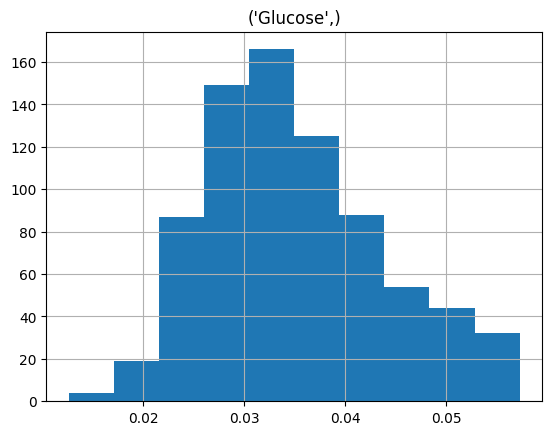

In [ ]:
scaled_df.hist(column="Glucose")

array([[<Axes: title={'center': "('BloodPressure',)"}>]], dtype=object)

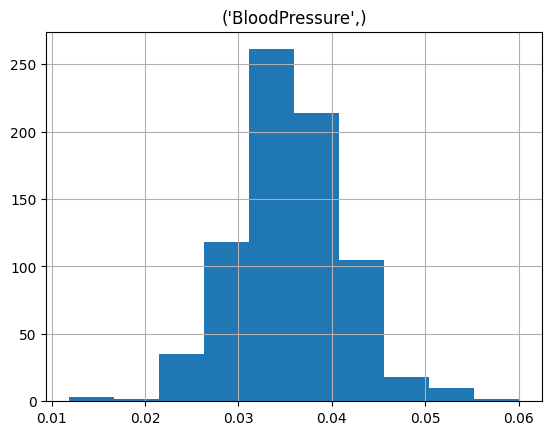

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
# dataset.iloc[:, 4]
print(X)
y = data.iloc[:,8].to_numpy()
print(y)


[[0.04235974 0.04257898 0.03546267 ... 0.03655192 0.03924821 0.05117289]
 [0.00705996 0.02445414 0.03250745 ... 0.02893694 0.02197149 0.03172719]
 [0.05647966 0.05264833 0.03152238 ... 0.02534702 0.04206507 0.03275065]
 ...
 [0.03529979 0.03481119 0.03546267 ... 0.0285018  0.01533622 0.03070373]
 [0.00705996 0.03624967 0.02955223 ... 0.03274443 0.02184629 0.04810252]
 [0.00705996 0.02675571 0.0344776  ... 0.03307079 0.019718   0.02353953]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
x_train_df = pd.DataFrame(x_train,columns = features)
x_test_df = pd.DataFrame(x_test,columns = features)

##Train model

In [ ]:
model = Sequential()
model.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 75.79
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 1 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

## MAX - MIN

In [ ]:
testX = np.copy(x_test)
max = np.max(testX,axis=0)
print(max)

min = np.min(testX,axis=0)
print(min)

[0.12001927 0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]
[0.         0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]


In [ ]:
# #pregnancies
# X_preg_max = np.copy(testX)
# for i in range(len(X)):
#     X_preg_max[i][0] = max[0]
# _, accuracy = model.evaluate(X_preg_max, y, verbose=0)
# print('Accuracy: %.2f' % (accuracy*100))
# predictions_preg_max = model.predict(X_preg_max) 

# # reshape = predictions_preg_max.reshape(1,-1)
# # print(reshape)
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_max[i].tolist(), predictions_preg_max[i], y[i]))


In [ ]:
prediction_max = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model.predict(X_max) 
  if len(prediction_max) == 0:
    prediction_max = predictions_sub_max
  else:
    prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
print(prediction_max)


8/8 [==============================] - 0s 2ms/step
[[0.5319893  0.883704   0.19691484 ... 0.6542538  0.78293675 0.31541765]
 [0.83535826 0.88871074 0.49683887 ... 0.9005494  0.90779614 0.5083649 ]
 [0.43628806 0.69718534 0.1023619  ... 0.57469034 0.59211403 0.25003254]
 ...
 [0.34232086 0.56664103 0.05625768 ... 0.52467936 0.35963362 0.16251789]
 [0.3490364  0.7810644  0.08100341 ... 0.48073423 0.5168763  0.20471938]
 [0.92383945 0.90343684 0.68061453 ... 0.89562523 0.9218821  0.87095976]]


In [ ]:
# min = X.min()
# #save a copy
# X_preg_min = testX
# for i in range(len(X)):
#     X_preg_min.iloc[i][1] = min[0]
# _, accuracy = model.evaluate(X_preg_min, y, verbose=0)
# predictions_preg_min = model.predict(X_preg_min) 
# for i in range(5):
# 	print('%s => %s (expected %d)' % (X_preg_min.iloc[i].tolist(), predictions_preg_min[i], y.iloc[i]))


In [ ]:
prediction_min = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model.predict(X_min) 
  if len(prediction_min) == 0:
    prediction_min = predictions_sub_min
  else:
    prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
print(prediction_min)


8/8 [==============================] - 0s 2ms/step
[[0.10666633 0.07938994 0.21300815 ... 0.09604245 0.20916905 0.126393  ]
 [0.34766978 0.08563883 0.52152604 ... 0.37633127 0.47906202 0.24511085]
 [0.07518598 0.02764399 0.11180345 ... 0.07051739 0.09503799 0.09476782]
 ...
 [0.05184029 0.02080186 0.0617392  ... 0.05836041 0.03750047 0.05743587]
 [0.05331927 0.03757798 0.08866955 ... 0.04941219 0.06894286 0.07478713]
 [0.66079956 0.1252322  0.7016986  ... 0.3314158  0.5250973  0.67942876]]


In [ ]:
#pregreant difference
result = np.subtract(prediction_max, prediction_min)
print(result.shape)

(231, 8)


In [ ]:
# heatmap_diff = pd.DataFrame(result, columns = ['Column_A','Column_B','Column_C'])
heatmap_diff = pd.DataFrame(result, columns = [data.columns[0:8]])
print(heatmap_diff)
print(heatmap_diff.describe().T)


    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.425323  0.804314     -0.016093      0.035950  0.105906  0.558211   
1      0.487688  0.803072     -0.024687      0.053736  0.036035  0.524218   
2      0.361102  0.669541     -0.009442      0.021747  0.108916  0.504173   
3      0.431702  0.782128     -0.014091      0.030890  0.123943  0.514085   
4      0.265150  0.650866     -0.006592      0.015791  0.100652  0.494936   
..          ...       ...           ...           ...       ...       ...   
226    0.467560  0.802704     -0.024688      0.053844  0.036108  0.607337   
227    0.509254  0.774827     -0.024446      0.053509  0.059670  0.616757   
228    0.290481  0.545839     -0.005482      0.012988  0.087262  0.466319   
229    0.295717  0.743486     -0.007666      0.017969  0.108189  0.431322   
230    0.263040  0.778205     -0.021084      0.046546  0.034878  0.564209   

    DiabetesPedigreeFunction       Age  
0                   0.573768  0.18

Text(83.25, 0.5, 'difference')

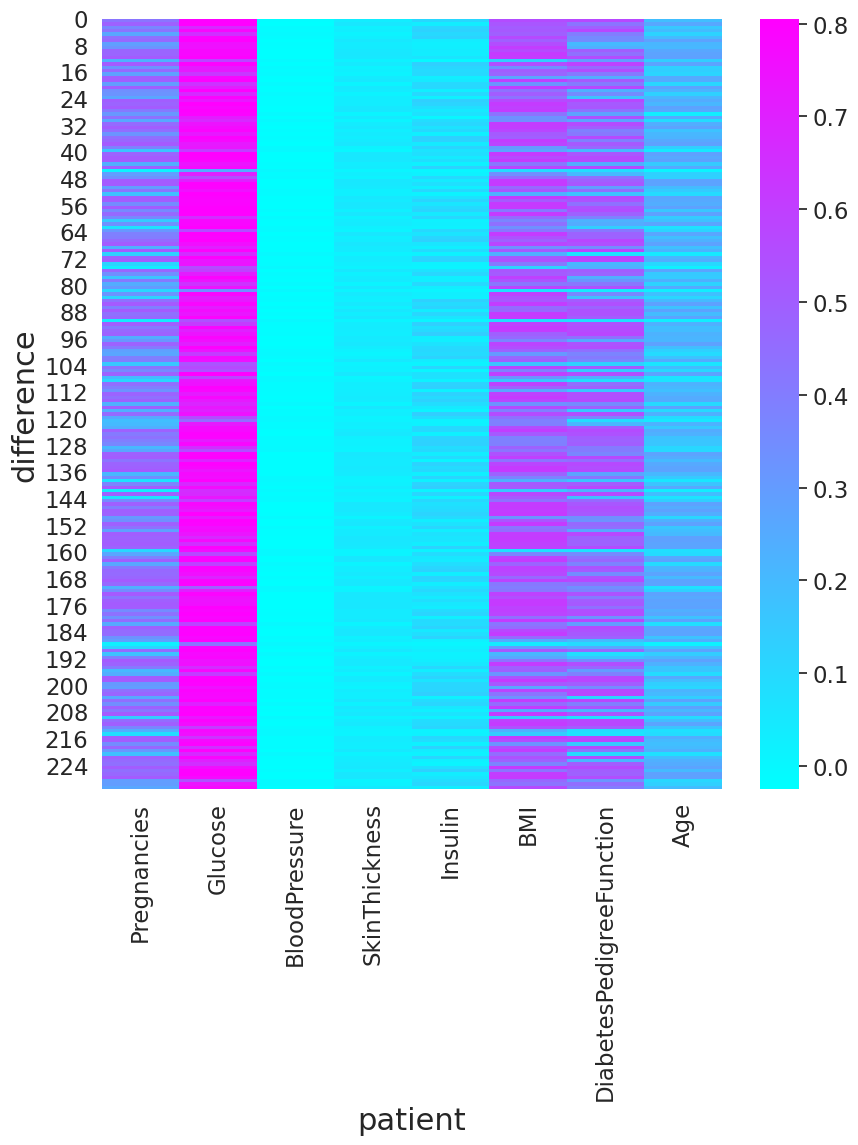

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_diff,cmap = 'cool')

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

##Outlier Detection

####changed!

In [ ]:
row_num_double = heatmap_diff[(heatmap_diff.iloc[:,1] < 0.55)].index 
print(row_num_double.values)

[ 45  47  81  90 103 105 120 170 187 228]


In [ ]:
sort = heatmap_diff[heatmap_diff.index.isin(row_num_double)]
print(sort)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
45     0.017373  0.243444     -0.000083      0.007991  0.006773  0.089994   
47     0.336446  0.544752     -0.006684      0.016085  0.100621  0.452119   
81     0.106641  0.337205     -0.001644      0.012293  0.008568  0.071375   
90     0.043036  0.541143     -0.001806      0.012573  0.009451  0.082640   
103    0.155713  0.530494     -0.002251      0.016997  0.017034  0.171526   
105    0.357924  0.534397     -0.010138      0.022840  0.006212  0.385250   
120    0.186234  0.452452     -0.002573      0.015598  0.018897  0.384574   
170    0.233456  0.488471     -0.004022      0.010490  0.075555  0.397396   
187    0.025698  0.425100     -0.001214      0.009001  0.007338  0.047463   
228    0.290481  0.545839     -0.005482      0.012988  0.087262  0.466319   

    DiabetesPedigreeFunction       Age  
45                  0.083882  0.014050  
47                  0.439211  0.125427  
81                  0.046668 

In [ ]:
filter = pd.DataFrame(x_test[heatmap_diff.index.isin(row_num_double)],columns = features)
print(filter)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.000000  0.051785       0.038418       0.080347  0.003351  0.064619   
1     0.007060  0.031934       0.030537       0.016579  0.043558  0.026109   
2     0.120019  0.046894       0.035463       0.052289  0.027283  0.044493   
3     0.042360  0.052648       0.046298       0.026191  0.019098  0.044384   
4     0.070600  0.042579       0.041373       0.061216  0.056721  0.040903   
5     0.091779  0.036250       0.044328       0.026191  0.019098  0.047213   
6     0.077660  0.038839       0.034037       0.026191  0.019098  0.056895   
7     0.007060  0.028770       0.036448       0.015304  0.011009  0.021213   
8     0.028240  0.056676       0.034478       0.049738  0.178059  0.039924   
9     0.007060  0.029633       0.039403       0.014029  0.019625  0.021104   

   DiabetesPedigreeFunction       Age  
0                  0.151484  0.025586  
1                  0.008638  0.023540  
2                  0.

In [ ]:
import statsmodels.stats.api as sms
interval = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean(), axis=0)
print(interval)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.014863  0.034370       0.034582       0.020588  0.003196  0.030341   
1     0.075505  0.048832       0.041575       0.053027  0.076184  0.051030   

   DiabetesPedigreeFunction       Age  
0                  0.025504  0.028321  
1                  0.099276  0.044140  


array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

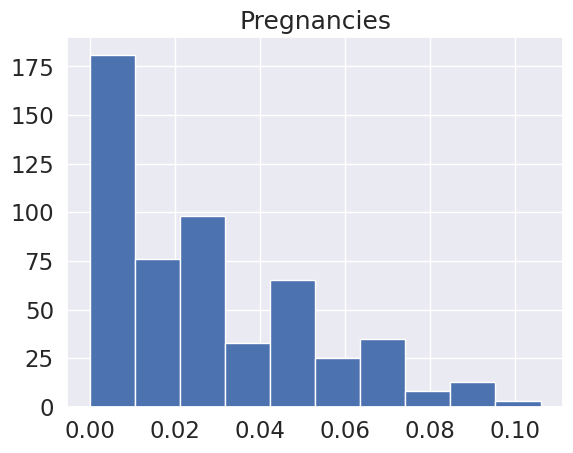

In [ ]:
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

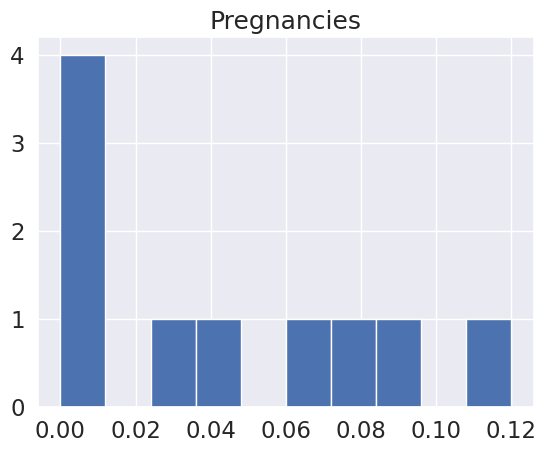

In [ ]:
filter.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

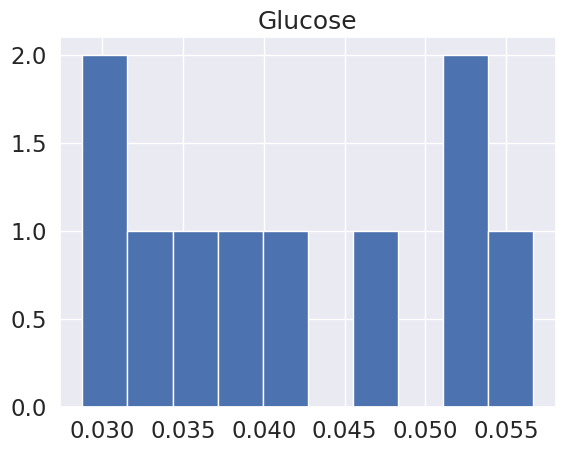

In [ ]:
filter.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

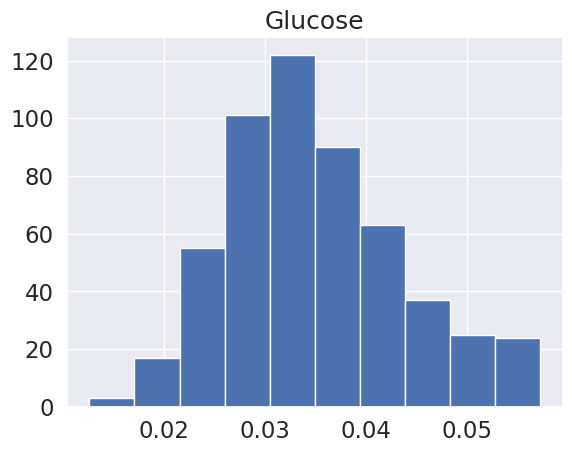

In [ ]:
x_train_df.hist(column="Glucose")

In [ ]:
import statsmodels.stats.api as sms
confid = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]
print(low_bd)
print(high_bd)

[0.01486269 0.03436979 0.03458172 0.02058772 0.00319599 0.03034115
 0.0255042  0.02832091]
[0.07550476 0.04883184 0.04157491 0.05302739 0.07618396 0.0510304
 0.09927631 0.0441399 ]


####changed!

In [ ]:
train_ref = x_train_df[ (x_train_df.iloc[:,1] > high_bd[1]) | (x_train_df.iloc[:,1] < low_bd[1])].index 
print(len(train_ref.values))

330


In [ ]:
train_clean_data = x_train_df[~x_train_df.index.isin(train_ref)]
print(train_clean_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
1       0.070600  0.037113       0.037433       0.035710  0.029198  0.039054   
2       0.028240  0.042579       0.029552       0.034434  0.076106  0.033615   
3       0.091779  0.044017       0.043343       0.047188  0.033506  0.044167   
4       0.007060  0.036825       0.023642       0.057390  0.046429  0.044058   
6       0.042360  0.044305       0.038418       0.052289  0.033506  0.050150   
..           ...       ...            ...            ...       ...       ...   
526     0.042360  0.047470       0.033493       0.033159  0.040207  0.036552   
529     0.063540  0.040277       0.046298       0.026191  0.019098  0.035573   
530     0.077660  0.034523       0.039403       0.047188  0.035899  0.046016   
532     0.028240  0.037113       0.042358       0.025507  0.064618  0.038184   
535     0.042360  0.035962       0.038418       0.039536  0.019098  0.030025   

     DiabetesPedigreeFunction       Age

In [ ]:
y_train_df = pd.DataFrame(y_train)
print(y_train_df)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
532  0
533  1
534  0
535  1
536  1

[537 rows x 1 columns]


In [ ]:
y_train_clean_data = y_train_df[~y_train_df.index.isin(train_ref)]
print(y_train_clean_data)

     0
1    0
2    1
3    0
4    1
6    0
..  ..
526  0
529  1
530  1
532  0
535  1

[207 rows x 1 columns]


###Train new model

In [ ]:
model_clean = Sequential()

model_clean.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model_clean.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model_clean.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))


model_clean.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_clean.fit(train_clean_data, y_train_clean_data, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model_clean.evaluate(train_clean_data, y_train_clean_data, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model_clean.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 61.84
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 1 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

In [ ]:
prediction_max_clean = []
for j in range(8):
  X_max = np.copy(x_test)
  for i in range(len(x_test)):
    X_max[i][j] = max[j]
  _, accuracy = model_clean.evaluate(X_max, y_test, verbose=0)
  predictions_sub_max = model_clean.predict(X_max) 
  if len(prediction_max_clean) == 0:
    prediction_max_clean = predictions_sub_max
  else:
    prediction_max_clean = np.concatenate((prediction_max_clean, predictions_sub_max), axis=1)
print(prediction_max_clean)


8/8 [==============================] - 0s 2ms/step
[[0.76270777 0.48137105 0.4446046  ... 0.5823301  0.78751343 0.5347573 ]
 [0.8026249  0.56060255 0.5379104  ... 0.68736464 0.8018434  0.54269916]
 [0.72031975 0.36264402 0.33412012 ... 0.49418205 0.71864176 0.48448578]
 ...
 [0.7240752  0.33089525 0.30414793 ... 0.48885274 0.63701755 0.46552584]
 [0.75104535 0.43732524 0.39881593 ... 0.55660313 0.7498468  0.5529061 ]
 [0.7916976  0.30986875 0.2880467  ... 0.4052751  0.66972053 0.49177924]]


In [ ]:
prediction_min_clean = []
for j in range(8):
  X_min = np.copy(x_test)
  for i in range(len(x_test)):
    X_min[i][j] = min[j]
  _, accuracy = model_clean.evaluate(X_min, y_test, verbose=0)
  predictions_sub_min = model_clean.predict(X_min) 
  if len(prediction_min_clean) == 0:
    prediction_min_clean = predictions_sub_min
  else:
    prediction_min_clean = np.concatenate((prediction_min_clean, predictions_sub_min), axis=1)
print(prediction_min_clean)

8/8 [==============================] - 0s 2ms/step
[[0.30567658 0.4429469  0.4548286  ... 0.39333642 0.45243928 0.3659583 ]
 [0.4125473  0.5222222  0.5481623  ... 0.50700235 0.5203356  0.3734054 ]
 [0.2729682  0.32770863 0.34337416 ... 0.3123988  0.31576076 0.3206196 ]
 ...
 [0.28633028 0.2991596  0.312962   ... 0.3078368  0.23695865 0.3051922 ]
 [0.3109463  0.39970732 0.40876186 ... 0.36859053 0.36065492 0.38309565]
 [0.27998358 0.30654824 0.3371552  ... 0.22868365 0.21651083 0.3016814 ]]


In [ ]:
result_clean = np.subtract(prediction_max_clean, prediction_min_clean)
heatmap_diff_clean = pd.DataFrame(result_clean, columns = [data.columns[0:8]])
print(heatmap_diff_clean)
print(heatmap_diff_clean.describe().T)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.457031  0.038424     -0.010224     -0.029680 -0.054810  0.188994   
1      0.390078  0.038380     -0.010252     -0.029830 -0.083005  0.180362   
2      0.447352  0.034935     -0.009254     -0.026607 -0.066683  0.181783   
3      0.447698  0.037091     -0.009833     -0.028613 -0.068226  0.184706   
4      0.442536  0.036763     -0.009712     -0.028007 -0.054430  0.188347   
..          ...       ...           ...           ...       ...       ...   
226    0.389448  0.038605     -0.010319     -0.029908 -0.095289  0.189056   
227    0.362343  0.037197     -0.009970     -0.029137 -0.081348  0.175133   
228    0.437745  0.031736     -0.008814     -0.025034 -0.072655  0.181016   
229    0.440099  0.037618     -0.009946     -0.028775 -0.056843  0.188013   
230    0.511714  0.003321     -0.049109     -0.050338 -0.119763  0.176591   

    DiabetesPedigreeFunction       Age  
0                   0.335074  0.16

Text(83.25, 0.5, 'difference')

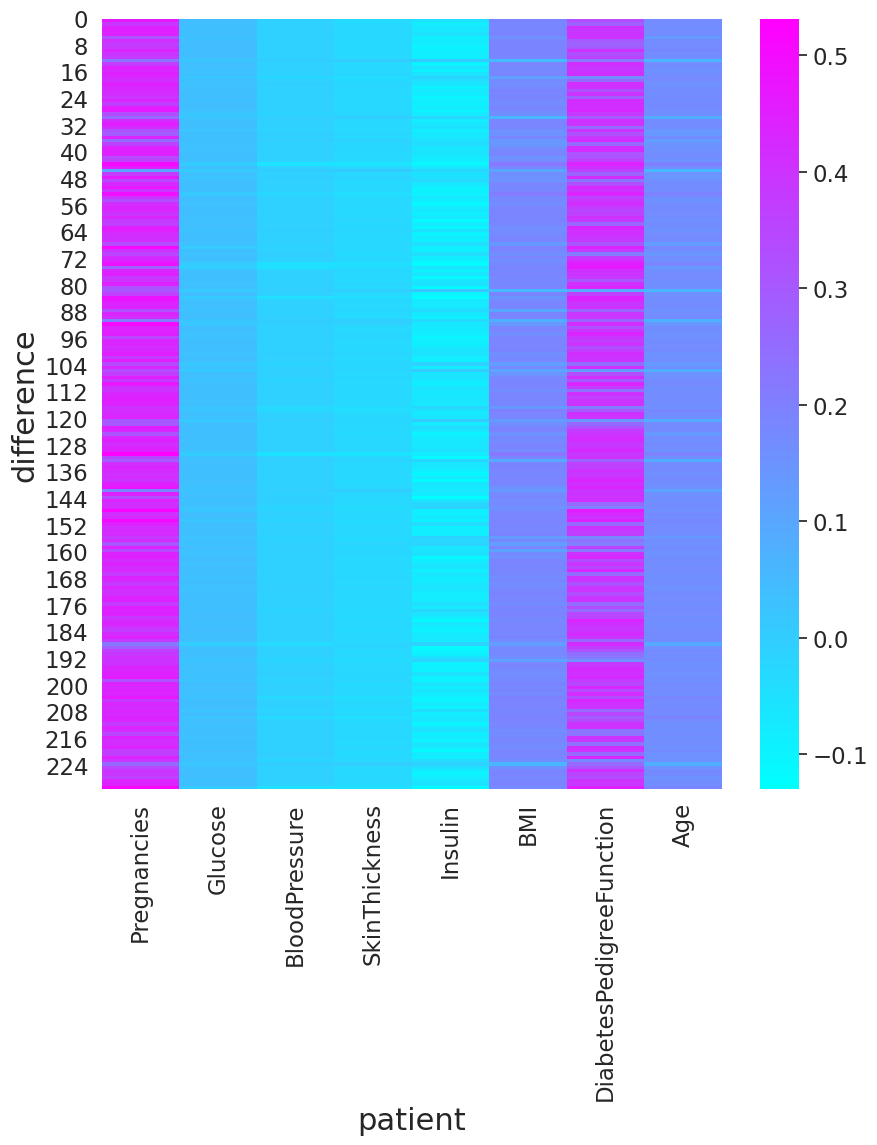

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_diff_clean,cmap = 'cool')

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)

###Validation

####changed!

In [ ]:
check_row_num_double= heatmap_diff_clean[(heatmap_diff_clean.iloc[:,1] < 0.55)].index 
print(check_row_num_double.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230]


In [ ]:
print(row_num_double)

Int64Index([45, 47, 81, 90, 103, 105, 120, 170, 187, 228], dtype='int64')


## Confidence interval MAX - MIN

In [ ]:
import statsmodels.stats.api as sms
x_test_df = pd.DataFrame(x_test, columns = [data.columns[0:8]])
confid = x_test_df.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


In [ ]:
print(low_bd)
print(high_bd)

[0.02592853 0.03412377 0.0354592  0.03187318 0.02432258 0.0339663
 0.02743483 0.03371798]
[0.03201813 0.0364496  0.03692008 0.03512155 0.03054805 0.03595773
 0.03338002 0.03696707]


In [ ]:
print(min)
print(max)

[0.         0.01639866 0.02364178 0.01020273 0.00335058 0.0209956
 0.00532073 0.02149261]
[0.12001927 0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]


In [ ]:
prediction_high = []
for j in range(8):
  X_high = np.copy(x_test)
  for i in range(len(x_test)):
    X_high[i][j] = high_bd[j]
  _, accuracy = model.evaluate(X_high, y_test, verbose=0)
  predictions_sub_high = model.predict(X_high) 
  if len(prediction_high) == 0:
    prediction_high = predictions_sub_high
  else:
    prediction_high = np.concatenate((prediction_high, predictions_sub_high), axis=1)
print(prediction_high)


8/8 [==============================] - 0s 2ms/step
[[0.17885749 0.44547108 0.20566104 ... 0.2219631  0.30799568 0.17244922]
 [0.49296275 0.46595055 0.51043946 ... 0.6183568  0.6074567  0.31864765]
 [0.12915163 0.19010845 0.10747043 ... 0.16923766 0.15018107 0.13102855]
 ...
 [0.09069254 0.11762914 0.0592171  ... 0.14267401 0.06152889 0.08068555]
 [0.09317099 0.26671457 0.08514713 ... 0.12247976 0.11079879 0.10428341]
 [0.78040135 0.48927802 0.6923238  ... 0.5640168  0.6504252  0.75324863]]


In [ ]:
prediction_low = []
for j in range(8):
  X_low = np.copy(x_test)
  for i in range(len(x_test)):
    X_low[i][j] = low_bd[j]
  _, accuracy = model.evaluate(X_low, y_test, verbose=0)
  predictions_sub_low = model.predict(X_low) 
  if len(prediction_low) == 0:
    prediction_low = predictions_sub_low
  else:
    prediction_low = np.concatenate((prediction_low, predictions_sub_low), axis=1)
print(prediction_low)


8/8 [==============================] - 0s 2ms/step
[[0.16267733 0.38275936 0.20646006 ... 0.2000907  0.28500354 0.16178893]
 [0.464439   0.40244824 0.5116599  ... 0.58688784 0.5808746  0.30225068]
 [0.11682832 0.15340103 0.10793985 ... 0.15154888 0.1366436  0.12254964]
 ...
 [0.08169463 0.09330423 0.05948979 ... 0.1273361  0.05546113 0.0751825 ]
 [0.08394992 0.21921934 0.08552842 ... 0.10903667 0.10039194 0.09734132]
 [0.7601812  0.42512727 0.6933632  ... 0.5314623  0.62495637 0.7387352 ]]


In [ ]:
result_bd = np.subtract(prediction_high, prediction_low)
print(result_bd.shape)

(231, 8)


In [ ]:
heatmap_bd_diff = pd.DataFrame(result_bd, columns = [data.columns[0:8]])
print(heatmap_bd_diff)

    Pregnancies   Glucose BloodPressure SkinThickness   Insulin       BMI  \
0      0.016180  0.062712     -0.000799      0.001630  0.000851  0.021872   
1      0.028524  0.063502     -0.001220      0.002494  0.001287  0.031469   
2      0.012323  0.036707     -0.000469      0.000978  0.000498  0.017689   
3      0.016630  0.055422     -0.000700      0.001396  0.000746  0.018370   
4      0.007962  0.034566     -0.000328      0.000709  0.000358  0.017081   
..          ...       ...           ...           ...       ...       ...   
226    0.028492  0.062826     -0.001221      0.002496  0.001287  0.032526   
227    0.027057  0.063356     -0.001210      0.002472  0.001273  0.030466   
228    0.008998  0.024325     -0.000273      0.000582  0.000286  0.015338   
229    0.009221  0.047495     -0.000381      0.000807  0.000415  0.013443   
230    0.020220  0.064151     -0.001039      0.002185  0.001132  0.032555   

    DiabetesPedigreeFunction       Age  
0                   0.022992  0.01

Text(83.25, 0.5, 'difference')

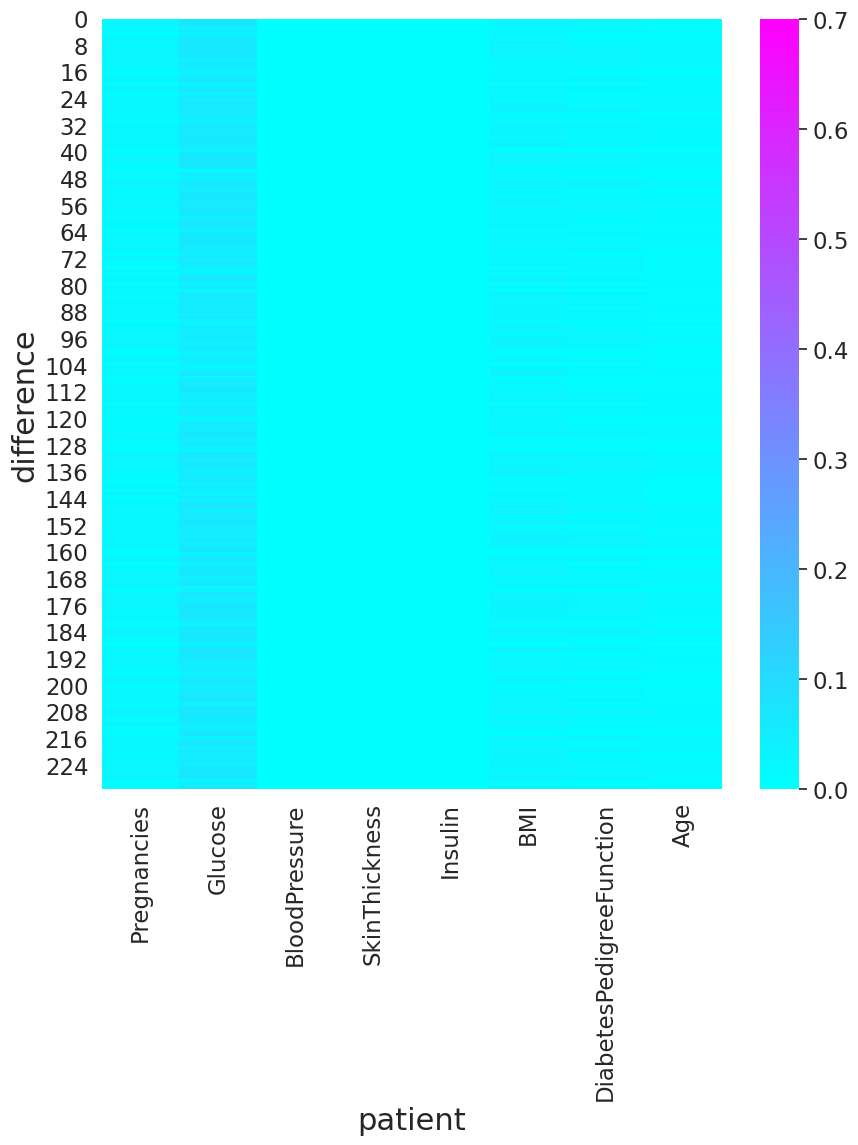

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
# ax = sns.heatmap(heatmap_bd_diff,cmap = sns.color_palette("vlag", as_cmap=True))
ax = sns.heatmap(heatmap_bd_diff,cmap = 'cool',vmin=0, vmax=0.7)

plt.xlabel('patient',fontsize=22)
plt.ylabel('difference',fontsize=22)